## Fluid Visualization Example
Simple visualization of 2D fluid flow simulation based on [Dan Schroeder's Fluid Dynamic Simulation](http://physics.weber.edu/schroeder/fluids/) website and adapted by [Tommy Marrinan](https://www.researchgate.net/profile/Thomas_Marrinan) as parallel computing demonstration tool.

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy import interpolate
from scipy import ndimage

# Uncompress the zip file of data that we will use in the notebook, will expand from ~50MB to ~2GB (text files)
import zipfile
zip_ref = zipfile.ZipFile('./DATA/fluid.zip', 'r')
zip_ref.extractall('./DATA')
zip_ref.close()

datafile = open('./DATA/lbmcfd_960x384_399.txt', 'r')

datafile, handle to file

In [3]:
datafile

<_io.TextIOWrapper name='./DATA/lbmcfd_960x384_399.txt' mode='r' encoding='UTF-8'>

load the file, just a ascii list of values

In [4]:
oned_fluidarray = np.loadtxt(datafile) # Loads of assci values, appears as a big array of 368,640

now we have array of values, we can use *```shape```* to see size of one dimensional array

In [5]:
oned_fluidarray

array([0., 0., 0., ..., 0., 0., 0.])

In [6]:
oned_fluidarray.shape

(368640,)

convert to two dimensional array

In [7]:
twod_fluidarray = np.reshape(oned_fluidarray,(384,960)) # Casts the array into a 2D array, 384 x 960

In [8]:
twod_fluidarray.shape

(384, 960)

Jupyter specific [magic commands](https://ipython.org/ipython-doc/3/interactive/magics.html#line-magics), `%matplotlib inline` allows plots/visualizations to be viewed inline within notebook.

In [9]:
%matplotlib inline

create contour plot of data, figsize sets for all pratical purposes the size and aspect

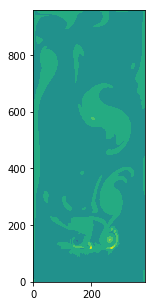

In [10]:
plt.figure(figsize=(2, 5)) # size of figure

X, Y = np.mgrid[0:384, 0:960]
fluidcontour = plt.contourf(X, Y, twod_fluidarray)

increase figure size to 8, 20 - **bigger image**

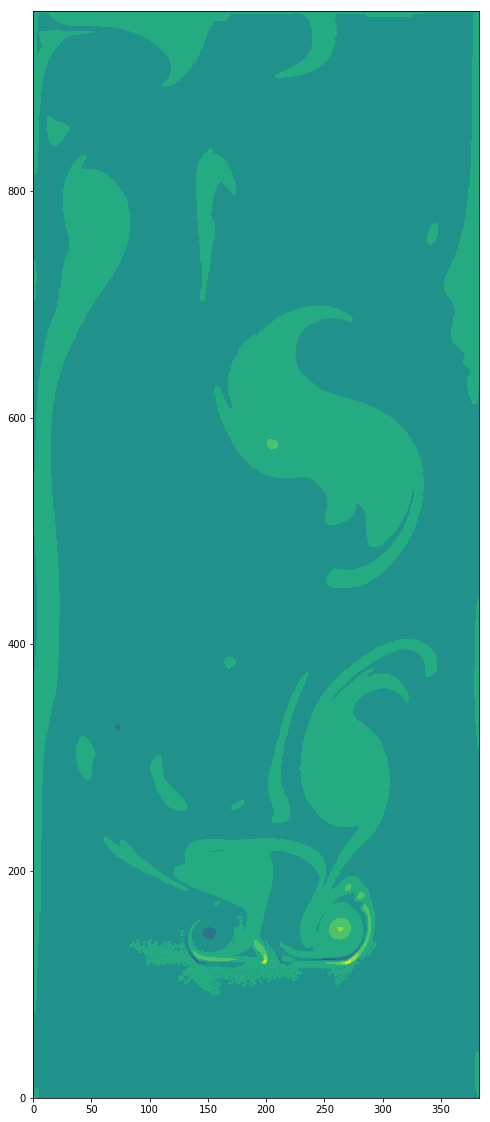

In [11]:
plt.figure(figsize=(8, 20)) # size of figure

X, Y = np.mgrid[0:384, 0:960]
fluidcontour = plt.contourf(X, Y, twod_fluidarray)

change the colormap

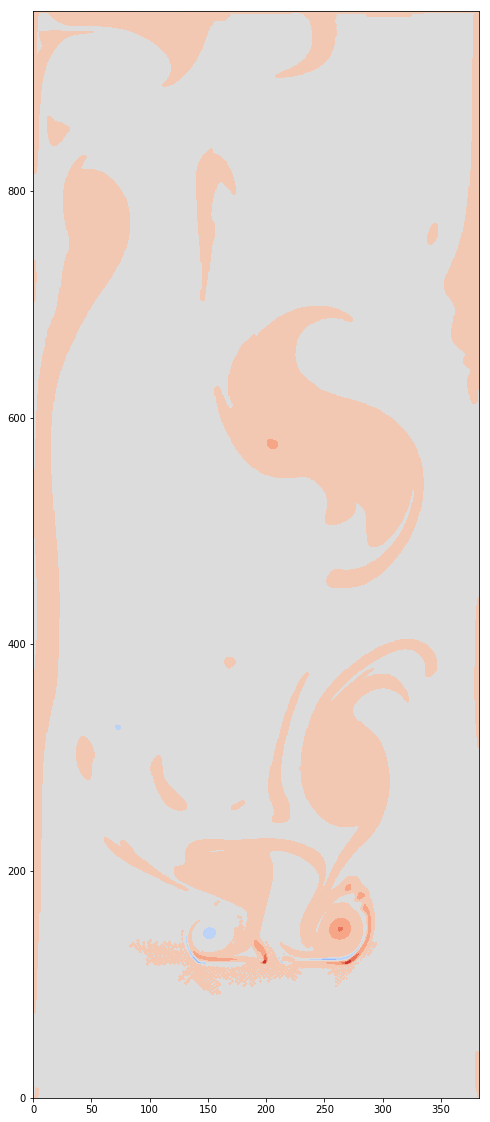

In [12]:
plt.figure(figsize=(8, 20)) # size of figure

X, Y = np.mgrid[0:384, 0:960]
fluidcontour = plt.contourf(X, Y, twod_fluidarray, cmap=plt.cm.coolwarm)

getting tired of scrolling, turn image on its side

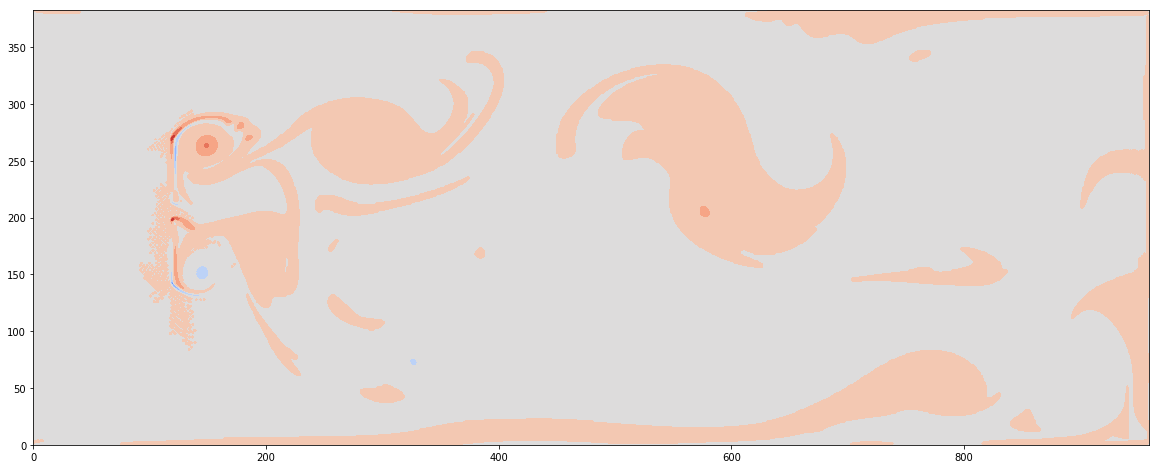

In [13]:
plt.figure(figsize=(20, 8)) # size of figure

X, Y = np.mgrid[0:384, 0:960]
fluidcontour = plt.contourf(Y, X, twod_fluidarray, cmap=plt.cm.coolwarm)

adding titles and labels to visualization

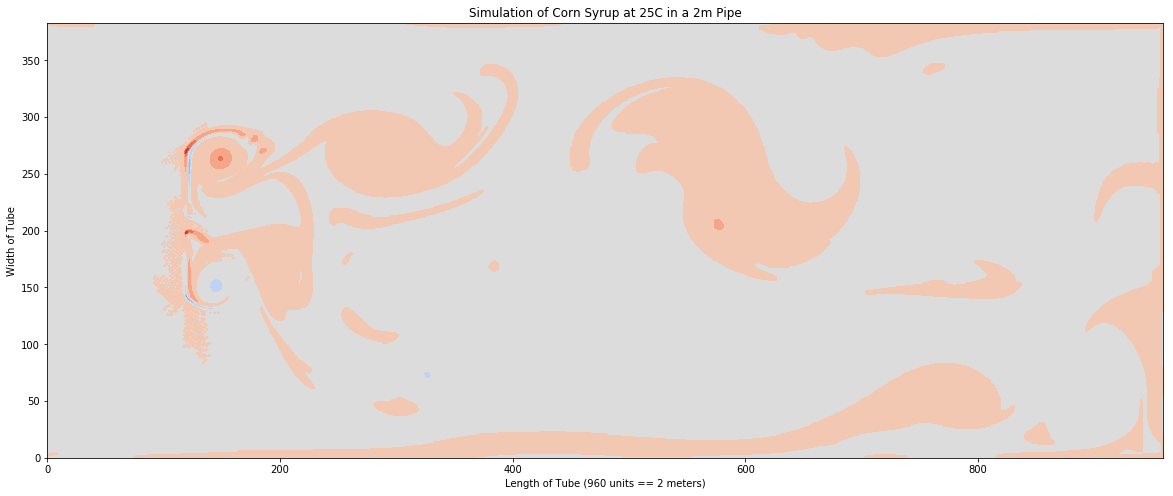

In [14]:
plt.figure(figsize=(20, 8)) # size of figure

X, Y = np.mgrid[0:384, 0:960]
fluidcontour = plt.contourf(Y, X, twod_fluidarray, cmap=plt.cm.coolwarm)
plt.title('Simulation of Corn Syrup at 25C in a 2m Pipe');
plt.ylabel('Width of Tube');
plt.xlabel('Length of Tube (960 units == 2 meters)');

make the font bigger

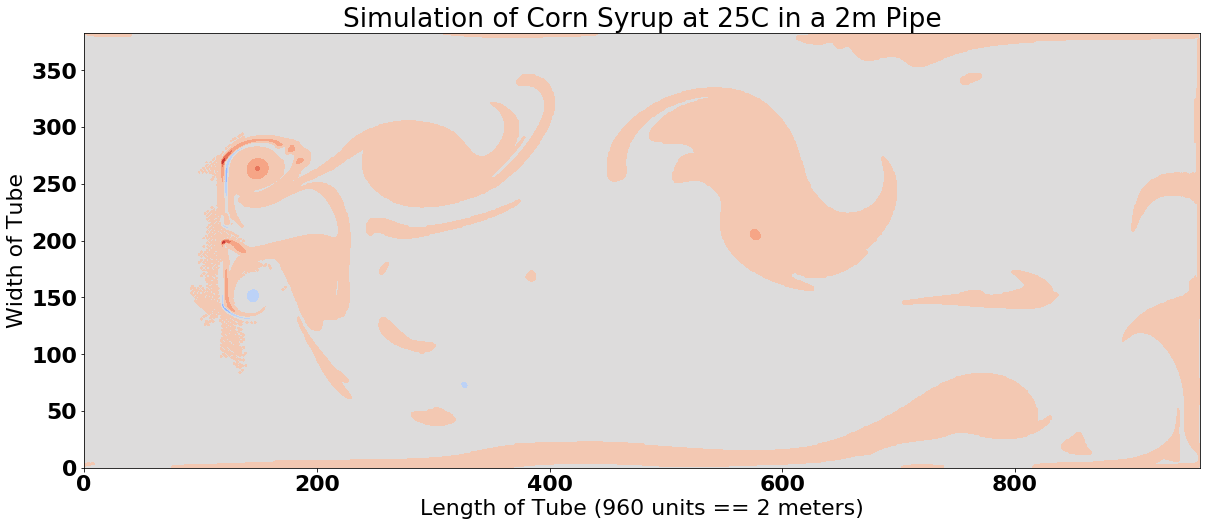

In [15]:
plt.figure(figsize=(20, 8)) # size of figure

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

X, Y = np.mgrid[0:384, 0:960]
fluidcontour = plt.contourf(Y, X, twod_fluidarray, cmap=plt.cm.coolwarm)
plt.title('Simulation of Corn Syrup at 25C in a 2m Pipe');
plt.ylabel('Width of Tube');
plt.xlabel('Length of Tube (960 units == 2 meters)');

add colorbar to the right side

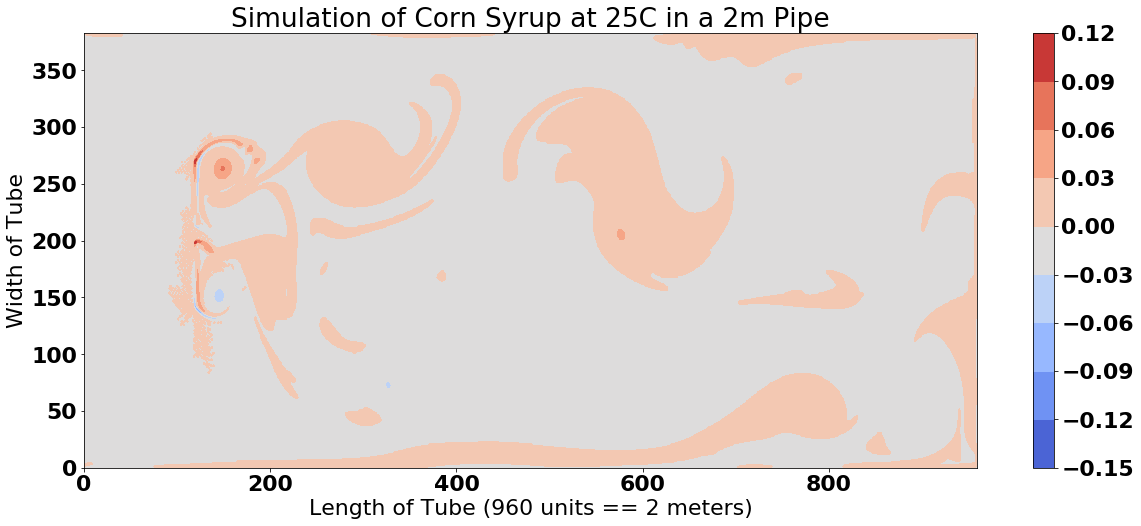

In [16]:
plt.figure(figsize=(20, 8)) # size of figure

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

X, Y = np.mgrid[0:384, 0:960]
fluidcontour = plt.contourf(Y, X, twod_fluidarray, cmap=plt.cm.coolwarm)
plt.title('Simulation of Corn Syrup at 25C in a 2m Pipe');
plt.ylabel('Width of Tube');
plt.xlabel('Length of Tube (960 units == 2 meters)');
plt.colorbar();

label the colorbar and add padding to label

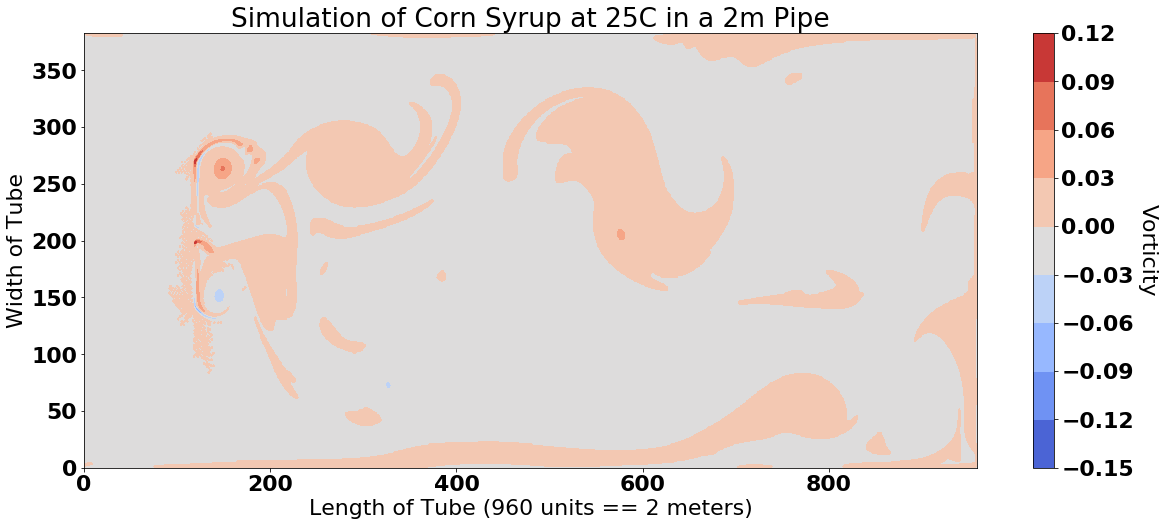

In [17]:
plt.figure(figsize=(20, 8)) # size of figure

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

X, Y = np.mgrid[0:384, 0:960]
fluidcontour = plt.contourf(Y, X, twod_fluidarray, cmap=plt.cm.coolwarm)
plt.title('Simulation of Corn Syrup at 25C in a 2m Pipe');
plt.ylabel('Width of Tube');
plt.xlabel('Length of Tube (960 units == 2 meters)');
cb = plt.colorbar();
cb.set_label('Vorticity', rotation=270, labelpad=24)

change axis labels

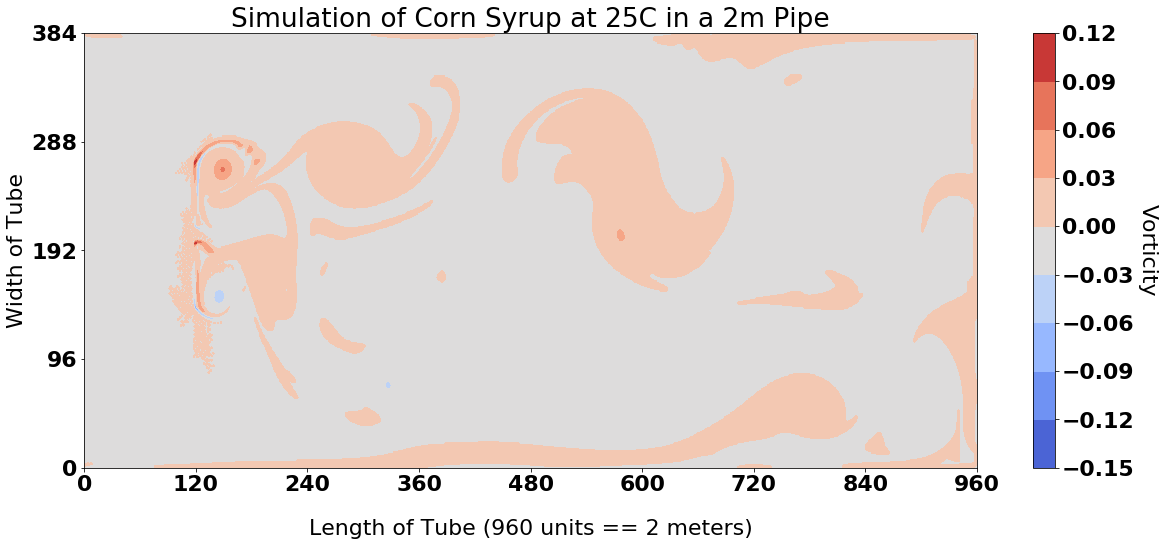

In [18]:
figure = plt.figure(figsize=(20, 8)) # size of figure

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
subp = plt.subplot(1,1,1)

X, Y = np.mgrid[0:384, 0:960]
fluidcontour = plt.contourf(Y, X, twod_fluidarray, cmap=plt.cm.coolwarm)
plt.title('Simulation of Corn Syrup at 25C in a 2m Pipe');
plt.ylabel('Width of Tube');
plt.xlabel('Length of Tube (960 units == 2 meters)', labelpad=24);
subp.set_xlim(0,960)
subp.set_ylim(0,384)
subp.set_xticks([0, 120, 240, 360, 480, 600, 720, 840, 960])
subp.set_yticks([0, 96, 192, 288, 384])
cb = plt.colorbar();
cb.set_label('Vorticity', rotation=270, labelpad=24)

overlay black contours

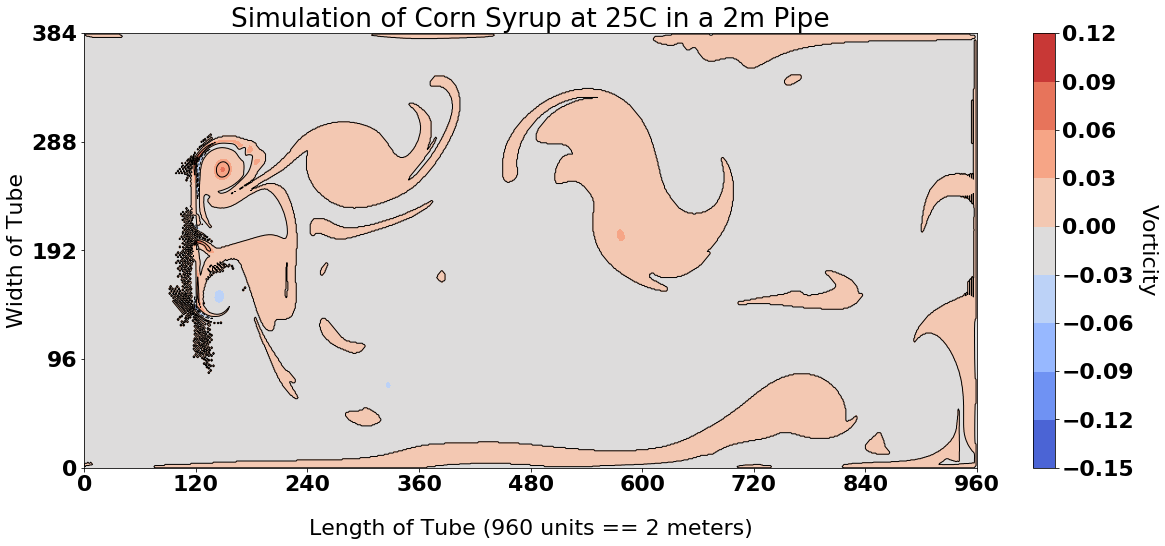

In [19]:
figure = plt.figure(figsize=(20, 8)) # size of figure

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
subp = plt.subplot(1,1,1)

X, Y = np.mgrid[0:384, 0:960]

fluidcontour = plt.contourf(Y, X, twod_fluidarray, cmap=plt.cm.coolwarm)
plt.title('Simulation of Corn Syrup at 25C in a 2m Pipe');
plt.ylabel('Width of Tube');
plt.xlabel('Length of Tube (960 units == 2 meters)', labelpad=24);
subp.set_xlim(0,960)
subp.set_ylim(0,384)
subp.set_xticks([0, 120, 240, 360, 480, 600, 720, 840, 960])
subp.set_yticks([0, 96, 192, 288, 384])
cb = plt.colorbar();
cb.set_label('Vorticity', rotation=270, labelpad=24)

c2 = plt.contour(Y, X, twod_fluidarray, 5, linewidths=1, colors='black')

increase contours to 10 from 5

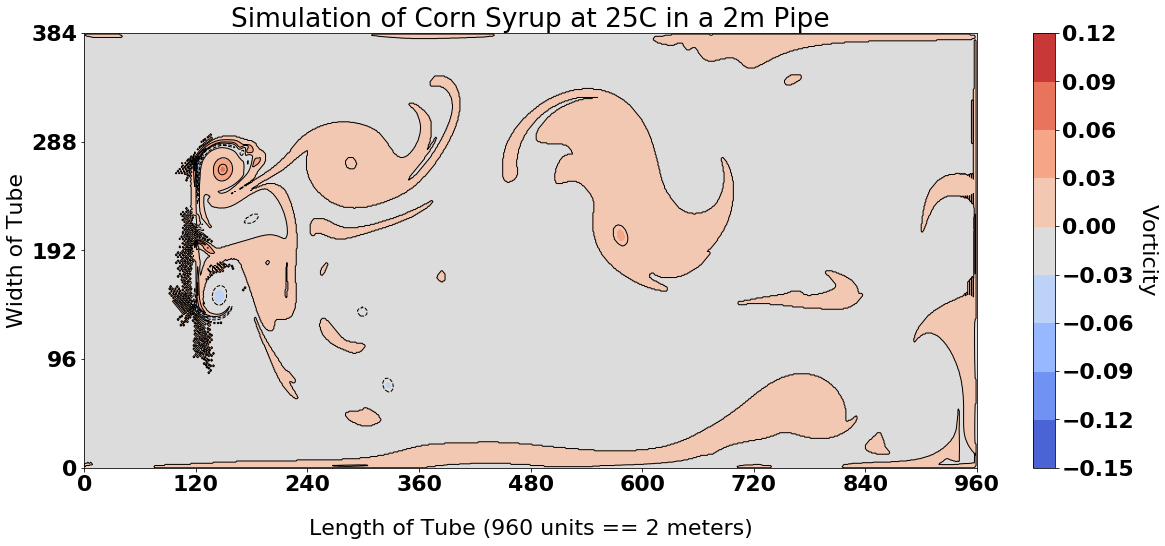

In [20]:
figure = plt.figure(figsize=(20, 8)) # size of figure

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
subp = plt.subplot(1,1,1)

X, Y = np.mgrid[0:384, 0:960]

fluidcontour = plt.contourf(Y, X, twod_fluidarray, cmap=plt.cm.coolwarm)
plt.title('Simulation of Corn Syrup at 25C in a 2m Pipe');
plt.ylabel('Width of Tube');
plt.xlabel('Length of Tube (960 units == 2 meters)', labelpad=24);
subp.set_xlim(0,960)
subp.set_ylim(0,384)
subp.set_xticks([0, 120, 240, 360, 480, 600, 720, 840, 960])
subp.set_yticks([0, 96, 192, 288, 384])
cb = plt.colorbar();
cb.set_label('Vorticity', rotation=270, labelpad=24)

c2 = plt.contour(Y, X, twod_fluidarray, 10, linewidths=1, colors='black')

## Movie

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure(figsize=(20, 8))

ims = []
for i in range(0,399,10):
    filename = "./DATA/lbmcfd_960x384_%03d.txt" % (i)
    filehandle = open(filename, 'r')
    fluidfile = np.loadtxt(filehandle)
    fluidarray = np.reshape(fluidfile,(384,960))
    plt.title('Simulation of Corn Syrup at 25C in a 2m Pipe');
    plt.ylabel('Width of Tube');
    plt.xlabel('Length of Tube (960 units == 2 meters)');

    im = plt.imshow(fluidarray, cmap=plt.cm.RdYlGn, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True)

Generate HTML representation of the animation

In [25]:
from IPython.display import HTML
HTML(ani.to_jshtml())